<a href="https://colab.research.google.com/github/gernandofranca/projetos_dsnp/blob/main/%5BProjeto_DSNP%5DPanorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

O COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados desta análise exploratória foram obtidos do repositório do Github do [Our World in Data](https://ourworldindata.org/coronavirus), que centraliza dados de casos confirmados, mortes, hospitalizações, testes, vacinações e outras variáveis de várias fontes importantes como OMS, Johns Hopkins University, ECDS e outras instuições envolvidas com a causa.

Analisar uma doença tão nova e trabalhar dados onde possa ocorrer conflito de interesses entre dados governamentais e não oficiais tem sido um  grande desafio para os cientistas de dados trabalharem algumas conclusões para ajudar na corrida contra o Covid-19.

O dataset está disponibilizado nos formatos CSV, XLSX e JSON com dados históricos sobre a pandemia.

### Dicionário de Variáveis



**Casos confirmados**

Variável  | Descrição 
-------------------|------------------
total_cases       | Total de casos confirmados de COVID-19 
new_cases	| Novos casos confirmados de COVID-19
new_cases_smoothed |	Novos casos confirmados de COVID-19 (suavizado por 7 dias)
total_cases_per_million |	Total de casos confirmados de COVID-19 por 1.000.000 de pessoas
new_cases_per_million	| Novos casos confirmados de COVID-19 por 1.000.000 de pessoas
new_cases_smoothed_per_million |	Novos casos confirmados de COVID-19 (corrigido em 7 dias) por 1.000.000 de pessoas

**Mortes confirmadas**

Variável  | Descrição 
-------------------|------------------
total_deaths |	Total de mortes atribuídas a COVID-19
new_deaths |	Novas mortes atribuídas a COVID-19
new_deaths_smoothed |	Novas mortes atribuídas a COVID-19 (suavizado 7 dias)
total_deaths_per_million |	Total de mortes atribuídas a COVID-19 por 1.000.000 de pessoas
new_deaths_per_million |	Novas mortes atribuídas a COVID-19 por 1.000.000 de pessoas
new_deaths_smoothed_per_million	| Novas mortes atribuídas a COVID-19 (suavizado por 7 dias) por 1.000.000 de pessoas

**Hospital e UTI**

Variável  | Descrição 
-------------------|------------------
icu_patients |	Número de pacientes COVID-19 em unidades de terapia intensiva (UTI) em um determinado dia
icu_patients_per_million |	Número de pacientes COVID-19 em unidades de terapia intensiva (UTI) em um determinado dia por 1.000.000 de pessoas
hosp_patients	| Número de pacientes COVID-19 no hospital em um determinado dia
hosp_patients_per_million |	Número de pacientes COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas
weekly_icu_admissions |	Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana
weekly_icu_admissions_per_million |	Número de pacientes COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana por 1.000.000 de pessoas
weekly_hosp_admissions |	Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana
weekly_hosp_admissions_per_million	| Número de pacientes COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas

    * *A descrição das demais variáveis utilizadas nesta análise podem ser obtivos [neste link](https://github.com/owid/covid-19-data/tree/master/public/data)

### Importando os dados do COVID-19

* Origem dos dados em  [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data). Usarei o formato `csv` neste projeto.


In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

Será analisado a consistência da base e avaliaçao de dados ausentes, identificação e tratamento de outliers e principais informações relevantes para a análise.

### Análise Exploratória Inicial



In [ ]:
# dimensões do dataset
print('Dimensões do dataset',
      '\nVariáveis: ', df.shape[1], "\n"
      'Entrada: ', df.shape[0])

# Visualizar as 5 primeiras entradas
df.head(5)


Dimensões do dataset 
Variáveis:  67 
Entrada:  162862


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#nome das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
#tipos de variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [ ]:
# verificando dados ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False), 2) *100

weekly_icu_admissions_per_million          97.0
weekly_icu_admissions                      97.0
excess_mortality_cumulative_per_million    97.0
excess_mortality                           97.0
excess_mortality_cumulative                97.0
                                           ... 
total_cases                                 2.0
population                                  1.0
date                                        0.0
location                                    0.0
iso_code                                    0.0
Length: 67, dtype: float64

In [ ]:
#Transformar a coluna "date" no formato datetime
df.date= pd.to_datetime(df.date)
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [ ]:
# Verificando data mais recente do dataset
df.date.max()

Timestamp('2022-02-18 00:00:00')

In [ ]:
# Total de casos
df= df[df['continent'].notna()]
df.loc[df.date == '2022-02-13'].sort_values(by='new_cases_smoothed', ascending=False)



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121933,RUS,Europe,Russia,2022-02-13,13923951.0,195813.0,187384.571,333421.0,694.0,679.571,95427.031,1341.994,1284.230,2285.082,4.756,4.657,1.18,NaN,NaN,NaN,NaN,NaN,NaN,121183.0,830.521,NaN,NaN,NaN,NaN,924307.0,6.335,0.2027,4.9,tests performed,157847689.0,77942040.0,70976666.0,11066586.0,190484.0,300629.0,108.18,53.42,48.64,7.58,2060.0,108221.0,0.074,NaN,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
57074,DEU,Europe,Germany,2022-02-13,12454304.0,62841.0,186685.000,119981.0,42.0,172.857,148441.407,748.995,2225.077,1430.040,0.501,2.060,0.99,2432.0,28.987,NaN,NaN,1678.0,20.000,7812.0,93.110,NaN,107094344.0,1276.445,NaN,350752.0,4.181,0.4430,2.3,tests performed,168122613.0,63302576.0,62249901.0,46171399.0,31883.0,188527.0,200.38,75.45,74.19,55.03,2247.0,14775.0,0.018,NaN,83900471.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,0.947,NaN,NaN,NaN,NaN
154706,USA,North America,United States,2022-02-13,77757081.0,56932.0,177927.429,920184.0,441.0,2331.286,233564.314,171.011,534.453,2764.020,1.325,7.003,0.52,14879.0,44.693,74216.0,222.928,NaN,NaN,70521.0,211.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548480978.0,252410565.0,213542355.0,92024718.0,142418.0,413768.0,165.20,76.03,64.32,27.72,1246.0,107998.0,0.033,58.80,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
53477,FRA,Europe,France,2022-02-13,21761364.0,86562.0,135863.286,134873.0,107.0,328.571,322763.549,1283.884,2015.118,2000.430,1.587,4.873,0.62,3305.0,49.020,31621.0,469.001,1723.0,25.555,15327.0,227.329,122239.0,242629318.0,3598.667,1.813,509100.0,7.551,0.2810,3.6,people tested,139322862.0,53896634.0,52002155.0,34500197.0,34652.0,188777.0,206.64,79.94,77.13,51.17,2800.0,7283.0,0.011,NaN,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
21592,BRA,South America,Brazil,2022-02-13,27492904.0,58618.0,135215.000,638673.0,327.0,879.857,128475.452,273.924,631.865,2984.545,1.528,4.112,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218905.0,1.023,NaN,NaN,tests performed,378011196.0,174214439.0,152338804.0,56491813.0,384881.0,1212875.0,176.65,81.41,71.19,26.40,5668.0,289685.0,0.135,NaN,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Podemos perceber que os países com mais casos no dia 06/02 são:


*   Russia - 178.616 novo casos
*   França - 155.439 novos casos
*   Holanda - 94.884 novos casos



In [ ]:
#Analisar por data mais atual, qual país tem mais mortes
df= df[df['continent'].notna()]
df.loc[df.date == '2022-02-13'].sort_values(by='new_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121933,RUS,Europe,Russia,2022-02-13,13923951.0,195813.0,187384.571,333421.0,694.0,679.571,95427.031,1341.994,1284.230,2285.082,4.756,4.657,1.18,NaN,NaN,NaN,NaN,NaN,NaN,121183.0,830.521,NaN,NaN,NaN,NaN,924307.0,6.335,0.2027,4.9,tests performed,1.578477e+08,77942040.0,70976666.0,11066586.0,190484.0,300629.0,108.18,53.42,48.64,7.58,2060.0,108221.0,0.074,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
154706,USA,North America,United States,2022-02-13,77757081.0,56932.0,177927.429,920184.0,441.0,2331.286,233564.314,171.011,534.453,2764.020,1.325,7.003,0.52,14879.0,44.693,74216.0,222.928,NaN,NaN,70521.0,211.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.484810e+08,252410565.0,213542355.0,92024718.0,142418.0,413768.0,165.20,76.03,64.32,27.72,1246.0,107998.0,0.033,58.8,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
68982,IND,Asia,India,2022-02-13,42665534.0,34113.0,56217.143,509011.0,346.0,876.714,30619.533,24.482,40.345,365.299,0.248,0.629,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415279.0,750735858.0,538.776,1.016,1506960.0,1.081,0.0373,26.8,samples tested,1.727912e+09,958033046.0,753481207.0,16397796.0,4540768.0,4575122.0,124.01,68.75,54.07,1.18,3283.0,974267.0,0.070,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
21592,BRA,South America,Brazil,2022-02-13,27492904.0,58618.0,135215.000,638673.0,327.0,879.857,128475.452,273.924,631.865,2984.545,1.528,4.112,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218905.0,1.023,NaN,NaN,tests performed,3.780112e+08,174214439.0,152338804.0,56491813.0,384881.0,1212875.0,176.65,81.41,71.19,26.40,5668.0,289685.0,0.135,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
149972,TUR,Asia,Turkey,2022-02-13,12908321.0,73787.0,95688.571,90542.0,276.0,258.286,151786.285,867.646,1125.182,1064.665,3.245,3.037,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419556.0,137382243.0,1615.449,4.933,445261.0,5.236,0.2149,4.7,tests performed,1.440071e+08,57564527.0,52623391.0,33819202.0,66184.0,156725.0,169.34,67.69,61.88,39.77,1843.0,10410.0,0.012,NaN,8.504274e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Países com mais mortes em 06/02/22:


*   India: 895 mortes 
*   Rússia: 650 mortes
*   Brazil: 419 mortes



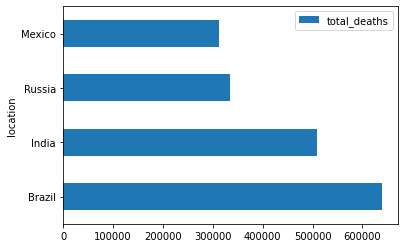

In [ ]:
#Plotar gráfico de barra para os 5 países com mais mortes
df= df[df['continent'].notna()]
top5_total_deaths=df.loc[df.date == '2022-02-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:5]
top5_total_deaths.plot('location', kind='barh')


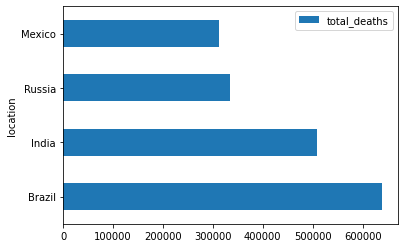

In [ ]:
#Plotar gráfico de barra para os 5 países com mais casos (curva suavizada 7 dias)
df= df[df['continent'].notna()]
top5_total_deaths=df.loc[df.date == '2022-02-13', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:5]
top5_total_deaths.plot('location', kind='barh')


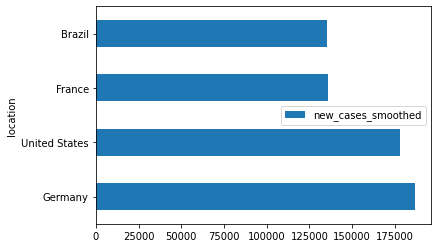

In [ ]:
#Plotar gráfico de barra para os 5 países com mais casos (7d)
df= df[df['continent'].notna()]
top5_total_deaths=df.loc[df.date == '2022-02-13', ['location', 'new_cases_smoothed']].sort_values(by="new_cases_smoothed", ascending=False)[1:5]
top5_total_deaths.plot('location', kind='barh')


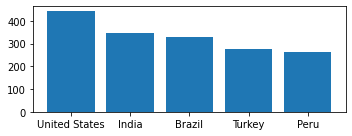

In [ ]:
# gráfico de barras para total de mortes
df= df[df['continent'].notna()]
top_5_total_deaths = df.loc[df.date == '2022-02-13', ['location', 'new_deaths']].sort_values(by="new_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(5,2))

ax.bar('location', 'new_deaths', data=top_5_total_deaths)

plt.tight_layout()


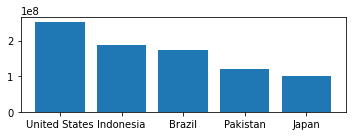

In [ ]:
# gráfico de barras para total de mortes
df= df[df['continent'].notna()]
top_5_total_deaths = df.loc[df.date == '2022-02-13', ['location', 'people_vaccinated']].sort_values(by="people_vaccinated", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(5,2))

ax.bar('location', 'people_vaccinated', data=top_5_total_deaths)

plt.tight_layout()


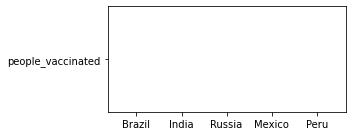

In [ ]:
# gráfico de barras para total de pessoas vacinadas
df= df[df['continent'].notna()]
top_5_people_vaccinated= df.loc[df.date == '2022-02-13', ['location', 'people_vaccinated']].sort_values(by="people_vaccinated", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(5,2))

ax.bar('location', 'people_vaccinated', data=top_5_total_deaths)

plt.tight_layout()

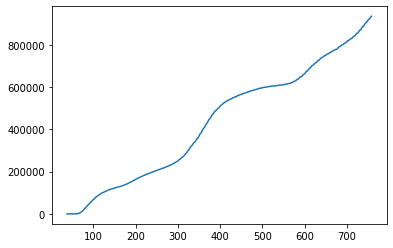

In [ ]:
#Plotar gráfico de linha para ver a evolução do total de casos de covid-19 no Brasil
df.loc[df.location == "United States", 'total_deaths'].reset_index(drop=True).plot()

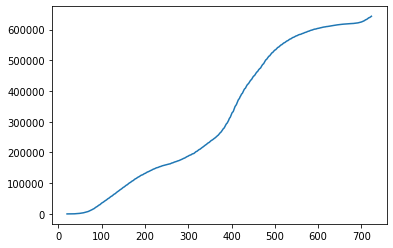

In [ ]:
#Plotar gráfico de linha para ver a evolução do total de casos de covid-19 no Brasil
df.loc[df.location == "Brazil", 'total_deaths'].reset_index(drop=True).plot()

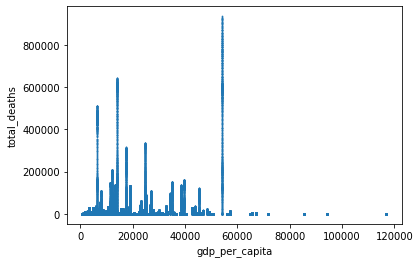

In [ ]:
#Plotar gráfico de dispersão considerando gpd_per_capita pelo número total de mortos
fig, ax = plt.subplots() 
df.plot.scatter(x='gdp_per_capita', y='total_deaths', ax=ax, s=.5)
plt.show()

Vamos......

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [ ]:
#Cópia do DataFrame apenas com Brasil
df_brasil= df.loc[df.location == "Brazil"].copy()

In [ ]:
df_brasil.date.min()


Timestamp('2020-02-26 00:00:00')

In [ ]:
df_brasil.head(50)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
20874,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
20875,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
20876,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
20877,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
20878,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
20879,BRA,South America,Brazil,2020-03-02,2.0,0.0,0.286,NaN,NaN,NaN,0.009,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
20880,BRA,South America,Brazil,2020-03-03,2.0,0.0,0.286,NaN,NaN,NaN,0.009,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
20881,BRA,South America,Brazil,2020-03-04,4.0,2.0,0.429,NaN,NaN,NaN,0.019,0.009,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,213993441.0,25.04,33.5,8.552,5.06,14103

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*